In [ ]:
import pandas as pd

In [1]:
medical_df = pd.read_csv('/content/sample_data/medical_insurance.csv')
medical_df.head()

NameError: name 'pd' is not defined

In [ ]:
smoker_codes = {'yes' : 1, 'no' : 0}
gender_codes = {'male' : 1, 'female' : 0}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_codes)
medical_df['gender_code'] = medical_df['sex'].map(gender_codes)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


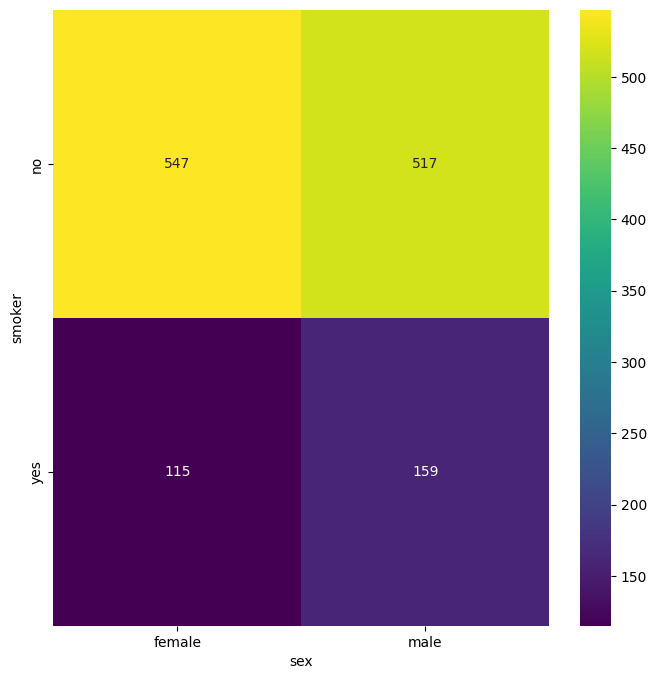

In [ ]:
# @title sex vs smoker

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in medical_df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

In [ ]:
inputs = medical_df[['age', 'bmi', 'children', 'smoker_code', 'gender_code', 'northeast', 'northwest', 'southeast', 'southwest']]
targets = medical_df[['charges']]

In [ ]:
from sklearn.model_selection import train_test_split
input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(input_train, target_train)

LinearRegression()

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse

train_predictions = model.predict(input_train)
test_predictions = model.predict(input_test)

print('Train Loss : ', rmse(target_train, train_predictions))
print('Test Loss : ', rmse(target_test, test_predictions))

Train Loss :  6082.272151066889
Test Loss :  5681.183886386303


In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(input_train, target_train)

Ridge(alpha=0.1)

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse

train_predictions = ridge_model.predict(input_train)
test_predictions = ridge_model.predict(input_test)

print('Train Loss : ', rmse(target_train, train_predictions))
print('Test Loss : ', rmse(target_test, test_predictions))

Train Loss :  6082.274163681281
Test Loss :  5680.903930660263


In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(input_train, target_train)

Lasso(alpha=0.1)

In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse

train_predictions = lasso_model.predict(input_train)
test_predictions = lasso_model.predict(input_test)

print('Train Loss : ', rmse(target_train, train_predictions))
print('Test Loss : ', rmse(target_test, test_predictions))

Train Loss :  6082.27217545091
Test Loss :  5681.191763296546
